In [10]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, norm, t, probplot
import matplotlib.pyplot as plt
import seaborn as sns

## all needed functions

## Problem 1

### Given the dataset in problem1.csv
1. Calculate the Mean, Variance, Skewness and Kurtosis of the data
2. Given a choice between a Normal Distribution and a T-Distribution, which one would youchoose to model the data? Why?
3. Fit both distributions and prove or disprove your choice in B using methods presented in class

Mean: 0.05019795790476916
Variance: 0.010322143931072109
Skewness: 0.1204447119194402
Kurtosis: 0.2229270674503816


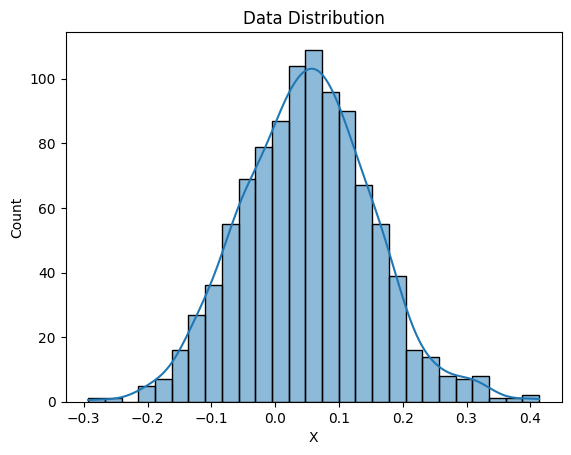

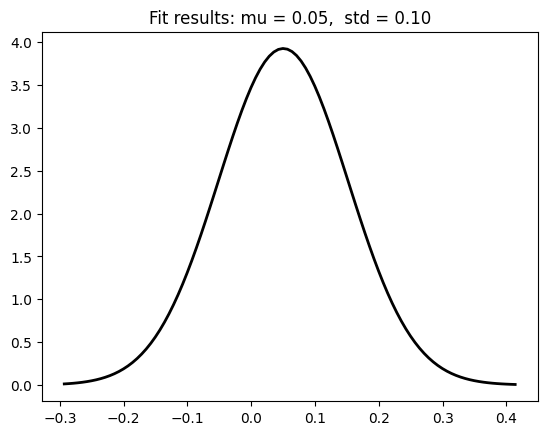

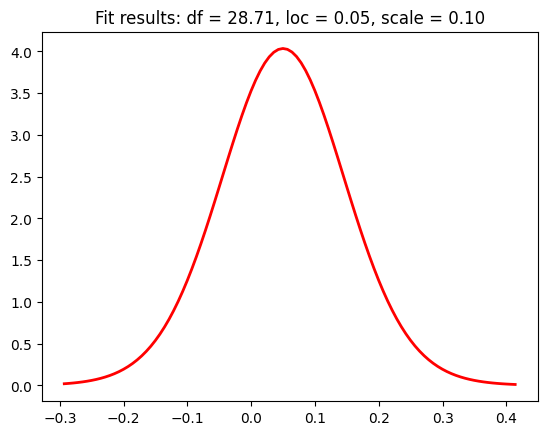

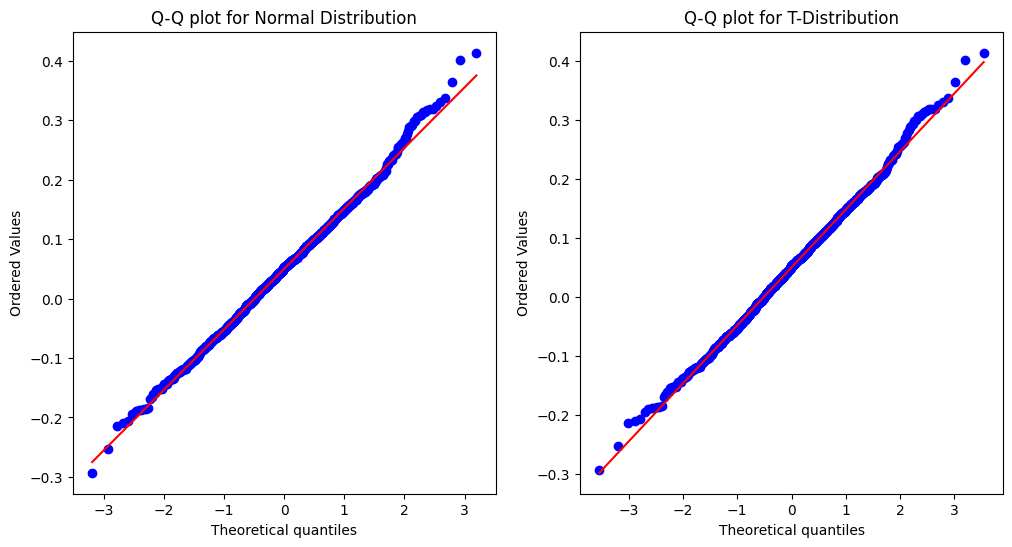

Normal Distribution: AIC = -1731.586728836508, BIC = -1721.7712182785438
T-Distribution: AIC = -1731.4183689195443, BIC = -1716.6951030825978
Normal Distribution is preferred based on AIC/BIC.
But the results are quite close, so we can't be sure.


In [12]:
# Load the dataset
data = pd.read_csv('problem1.csv')
data = data['X']


# Drop NaN values
data = data.dropna()
mean = np.mean(data)
variance = np.var(data)
skewness = skew(data)
kurt = kurtosis(data)

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

# Plot the data
sns.histplot(data, kde=True)
plt.title('Data Distribution')
plt.show()

# Fit Normal Distribution
mu, std = norm.fit(data)
x = np.linspace(min(data), max(data), 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Fit T-Distribution
df, loc, scale = t.fit(data)
p = t.pdf(x, df, loc, scale)

plt.plot(x, p, 'r', linewidth=2)
title = "Fit results: df = %.2f, loc = %.2f, scale = %.2f" % (df, loc, scale)
plt.title(title)
plt.show()
plt.close()
# Q-Q plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot for Normal Distribution')

plt.subplot(1, 2, 2)
probplot(data, dist="t", sparams=(df,), plot=plt)
plt.title('Q-Q plot for T-Distribution')

plt.show()

# Calculate AIC and BIC for both distributions
n = len(data)
log_likelihood_norm = np.sum(norm.logpdf(data, mu, std))
log_likelihood_t = np.sum(t.logpdf(data, df, loc, scale))

aic_norm = 2 * 2 - 2 * log_likelihood_norm
bic_norm = np.log(n) * 2 - 2 * log_likelihood_norm

aic_t = 2 * 3 - 2 * log_likelihood_t
bic_t = np.log(n) * 3 - 2 * log_likelihood_t

print(f"Normal Distribution: AIC = {aic_norm}, BIC = {bic_norm}")
print(f"T-Distribution: AIC = {aic_t}, BIC = {bic_t}")

# Decision based on AIC/BIC
if aic_norm < aic_t and bic_norm < bic_t:
    print("Normal Distribution is preferred based on AIC/BIC.")
else:
    print("T-Distribution is preferred based on AIC/BIC.")
print("But the results are quite close, so we can't be sure.")

## Answer 1
1) 
    Mean: 0.05019795790476916

    Variance: 0.010322143931072109

    Skewness: 0.1204447119194402

    Kurtosis: 0.2229270674503816


2) 
    I would rather normal distribution, because the sample size is large.

3) 
    Based on AIC and BIC and QQ plot, the normal distribution better fits the data, to a minor extent.